In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.datafreame th {
    border: 1px black solid;
    color: black;
}

In [2]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
import plotly.graph_objects as go

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yososky/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Data pre-processing

In [3]:
# read the dataset
df = pd.read_excel("Tweet Data.xlsx")

In [4]:
df.head()

tweet_id negativereason         airline        name  \
0  570306133677760000            NaN  Virgin America     cairdin   
1  570301130888121984            NaN  Virgin America    jnardino   
2  570301083672812992            NaN  Virgin America  yvonnalynn   
3  570301031407624000     Bad Flight  Virgin America    jnardino   
4  570300817074462016     Can't Tell  Virgin America    jnardino   

  tweet_location  retweet_count  \
0            NaN              0   
1            NaN              0   
2      Lets Play              0   
3            NaN              0   
4            NaN              0   

                                                text  
0                @VirginAmerica What @dhepburn said.  
1  @VirginAmerica plus you've added commercials t...  
2  @VirginAmerica I didn't today... Must mean I n...  
3  @VirginAmerica it's really aggressive to blast...  
4  @VirginAmerica and it's a really big bad thing...

In [5]:
df.shape

(14640, 7)

In [6]:
# get the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 7 columns):
tweet_id          14640 non-null int64
negativereason    9178 non-null object
airline           14640 non-null object
name              14640 non-null object
tweet_location    9907 non-null object
retweet_count     14640 non-null int64
text              14640 non-null object
dtypes: int64(2), object(5)
memory usage: 800.8+ KB


In [7]:
#figure if there some null value will effect on our project
df.isnull().sum()

tweet_id             0
negativereason    5462
airline              0
name                 0
tweet_location    4733
retweet_count        0
text                 0
dtype: int64

In [8]:
#filter and left the useful information only
df.drop(columns = ['tweet_id', 'name'], axis = 1, inplace = True)

In [9]:
df.columns

Index(['negativereason', 'airline', 'tweet_location', 'retweet_count', 'text'], dtype='object')

### Finding the sentiment for each tweets

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [12]:
sid = SentimentIntensityAnalyzer()

In [13]:
sid.polarity_scores(df.text[0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [14]:
df['polarity_score'] = df.text.apply(lambda x: sid.polarity_scores(x))

In [15]:
df.head()

negativereason         airline tweet_location  retweet_count  \
0            NaN  Virgin America            NaN              0   
1            NaN  Virgin America            NaN              0   
2            NaN  Virgin America      Lets Play              0   
3     Bad Flight  Virgin America            NaN              0   
4     Can't Tell  Virgin America            NaN              0   

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                      polarity_score  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
3  {'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'comp...  
4  {'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'comp...

In [16]:
df['score'] = df.polarity_score.apply(lambda x: x['compound'])

In [17]:
def find_sentiment(x):
    
    if x > 0:
        return "Positive"
    elif x < 0: 
        return "Negative"
    else:
        return "Neutral"

In [18]:
df["sentiment"] = df.score.apply(lambda x: find_sentiment(x))

In [19]:
df.head()

negativereason         airline tweet_location  retweet_count  \
0            NaN  Virgin America            NaN              0   
1            NaN  Virgin America            NaN              0   
2            NaN  Virgin America      Lets Play              0   
3     Bad Flight  Virgin America            NaN              0   
4     Can't Tell  Virgin America            NaN              0   

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                      polarity_score   score sentiment  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.0000   Neutral  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.0000   Neutral  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.0000   Neutral  
3  {'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'comp... -0.5984  Negative  
4  {'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'comp... -0.5829  Negative

### now we can drop polaarity score and score column. Also visulize the result of our figure

In [20]:
df.drop(columns = ['polarity_score', 'score'], axis = 1, inplace = True)

In [21]:
df.head()

negativereason         airline tweet_location  retweet_count  \
0            NaN  Virgin America            NaN              0   
1            NaN  Virgin America            NaN              0   
2            NaN  Virgin America      Lets Play              0   
3     Bad Flight  Virgin America            NaN              0   
4     Can't Tell  Virgin America            NaN              0   

                                                text sentiment  
0                @VirginAmerica What @dhepburn said.   Neutral  
1  @VirginAmerica plus you've added commercials t...   Neutral  
2  @VirginAmerica I didn't today... Must mean I n...   Neutral  
3  @VirginAmerica it's really aggressive to blast...  Negative  
4  @VirginAmerica and it's a really big bad thing...  Negative

In [22]:
df.sentiment.value_counts()

Positive    6222
Negative    5153
Neutral     3265
Name: sentiment, dtype: int64

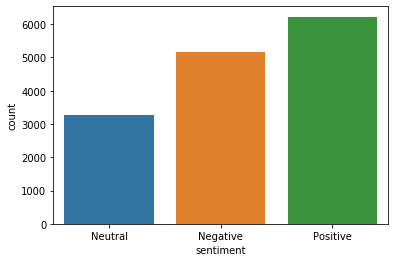

In [23]:
sns.countplot(x = 'sentiment', data = df)

In [24]:
fig = go.Figure()

c = ['green','red','blue']

fig.add_trace(go.Bar(x = df.sentiment.value_counts().index,
                     y = df.sentiment.value_counts(),
                     marker_color = c,
                     text = df.sentiment.value_counts(),
                     textposition='auto'))

fig.update_layout(title = dict(text = "Sentiment count"))

### Topic Modeling of the tweets
In this section, according to key-words. Texts will fit into a related topic.

In [25]:
import spacy

In [26]:
nlp = spacy.load('en_core_web_sm')

In [27]:
def tokenization(s):
    text = nlp(s.lower())
    token = []
    
    for t in text:
        token.append(t.lemma_)
    
    return token

In [28]:
df["lemma"] = df.text.apply(lambda x: tokenization(x))

In [29]:
df.head()

negativereason         airline tweet_location  retweet_count  \
0            NaN  Virgin America            NaN              0   
1            NaN  Virgin America            NaN              0   
2            NaN  Virgin America      Lets Play              0   
3     Bad Flight  Virgin America            NaN              0   
4     Can't Tell  Virgin America            NaN              0   

                                                text sentiment  \
0                @VirginAmerica What @dhepburn said.   Neutral   
1  @VirginAmerica plus you've added commercials t...   Neutral   
2  @VirginAmerica I didn't today... Must mean I n...   Neutral   
3  @VirginAmerica it's really aggressive to blast...  Negative   
4  @VirginAmerica and it's a really big bad thing...  Negative   

                                               lemma  
0          [@virginamerica, what, @dhepburn, say, .]  
1  [@virginamerica, plus, -PRON-, have, add, comm...  
2  [@virginamerica, i, do, not, today, ..., must,...  
3  [@virginamerica, -PRON-, be, really, aggressiv...  
4  [@virginamerica, and, -PRON-, be, a, really, b...

In [30]:
def stopwords(s):
    
    l = []
    
    for i in s:
        if i not in nlp.Defaults.stop_words:
            l.append(i)
            
    
    
    return " ".join(l)

In [31]:
df['proccesed_text'] = df.lemma.apply(lambda x: stopwords(x))

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
tdf = TfidfVectorizer(max_df=0.9, min_df=10)

In [34]:
dtm = tdf.fit_transform(df["proccesed_text"])

In [35]:
#LDA is applied in this part for machine learning
from sklearn.decomposition import ss

In [36]:
lda = LatentDirichletAllocation(n_components= 10, random_state= 0)

In [37]:
lda.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

### Shown the result of the top 20 words for each topics.

In [38]:
for i, topic in enumerate(lda.components_):
    print(f"Top 20 words for topic {i}")
    print([tdf.get_feature_names()[index] for index in topic.argsort()[-20:]])
    print("\n")

Top 20 words for topic 0
['thank', 'flightr', 'jetblue', 'hold', 'dfw', 'need', 'unite', 'flightled', 'southwestair', 'late', 'tomorrow', 'delay', 'help', 'hour', 'usairway', 'flightle', 'americanair', 'cancel', 'flight', 'pron']


Top 20 words for topic 1
['update', 'late', 'time', 'leave', 'min', 'jetblue', 'connection', 'miss', 'americanair', 'sit', 'wait', 'gate', 'usairway', 'hour', 'unite', 'united', 'delay', 'plane', 'flight', 'pron']


Top 20 words for topic 2
['phone', 'need', 'service', 'southwestair', 'agent', 'time', 'luggage', 'lose', 'help', 'united', 'unite', 'minute', 'wait', 'bag', 'hour', 'flight', 'americanair', 'usairway', 'hold', 'pron']


Top 20 words for topic 3
['co', 'airline', 'continue', 'airway', 'win', 'policy', 'lie', 'fail', 'snow', 'americanair', 'united', 'boarding', 'jetblue', 'usairway', 'pass', 'suck', 'flight', 'unite', 'southwestair', 'pron']


Top 20 words for topic 4
['look', 'far', 'time', 'phone', 'online', 'fee', 'united', 'bag', 'check', 'cha

In [39]:
topic = lda.transform(dtm)

In [40]:
df["topic"] = topic.argmax(axis = 1)

In [41]:
df.head()

negativereason         airline tweet_location  retweet_count  \
0            NaN  Virgin America            NaN              0   
1            NaN  Virgin America            NaN              0   
2            NaN  Virgin America      Lets Play              0   
3     Bad Flight  Virgin America            NaN              0   
4     Can't Tell  Virgin America            NaN              0   

                                                text sentiment  \
0                @VirginAmerica What @dhepburn said.   Neutral   
1  @VirginAmerica plus you've added commercials t...   Neutral   
2  @VirginAmerica I didn't today... Must mean I n...   Neutral   
3  @VirginAmerica it's really aggressive to blast...  Negative   
4  @VirginAmerica and it's a really big bad thing...  Negative   

                                               lemma  \
0          [@virginamerica, what, @dhepburn, say, .]   
1  [@virginamerica, plus, -PRON-, have, add, comm...   
2  [@virginamerica, i, do, not, today, ..., must,...   
3  [@virginamerica, -PRON-, be, really, aggressiv...   
4  [@virginamerica, and, -PRON-, be, a, really, b...   

                                      proccesed_text  topic  
0                         @virginamerica @dhepburn .      7  
1  @virginamerica plus -PRON- add commercial expe...      3  
2          @virginamerica today ... mean need trip !      9  
3  @virginamerica -PRON- aggressive blast obnoxio...      3  
4         @virginamerica -PRON- big bad thing -PRON-      8

In [42]:
df.drop(columns=['lemma', 'proccesed_text'], axis =1, inplace = True)

In [43]:
df.head()

negativereason         airline tweet_location  retweet_count  \
0            NaN  Virgin America            NaN              0   
1            NaN  Virgin America            NaN              0   
2            NaN  Virgin America      Lets Play              0   
3     Bad Flight  Virgin America            NaN              0   
4     Can't Tell  Virgin America            NaN              0   

                                                text sentiment  topic  
0                @VirginAmerica What @dhepburn said.   Neutral      7  
1  @VirginAmerica plus you've added commercials t...   Neutral      3  
2  @VirginAmerica I didn't today... Must mean I n...   Neutral      9  
3  @VirginAmerica it's really aggressive to blast...  Negative      3  
4  @VirginAmerica and it's a really big bad thing...  Negative      8

In [44]:
reason = df.negativereason.value_counts()

In [45]:
fig = go.Figure()

fig.add_trace(go.Bar(x = reason.index,
                     y = reason))

In [46]:
df.retweet_count.unique()

array([ 0,  1,  2,  3,  4,  5,  7, 22,  6, 18, 15, 31, 11,  8,  9, 28, 32,
       44])

## Word cloud
In order to anaylze compaint, we only use tweets with negatvie attitude according to the sentiment anaylze

In [47]:
df_neg = df[df['sentiment'] == 'Negative']
df_neg.head()  

negativereason         airline   tweet_location  retweet_count  \
3      Bad Flight  Virgin America              NaN              0   
4      Can't Tell  Virgin America              NaN              0   
5      Can't Tell  Virgin America              NaN              0   
8             NaN  Virgin America        San Diego              0   
10            NaN  Virgin America  1/1 loner squad              0   

                                                 text sentiment  topic  
3   @VirginAmerica it's really aggressive to blast...  Negative      3  
4   @VirginAmerica and it's a really big bad thing...  Negative      8  
5   @VirginAmerica seriously would pay $30 a fligh...  Negative      8  
8   @virginamerica Well, I didn'tâ€¦but NOW I DO! :-D  Negative      7  
10  @VirginAmerica did you know that suicide is th...  Negative      6

In [48]:
df_neg.to_csv (r'negativeTweets.csv', index = False, header=True)

In [49]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk import word_tokenize

In [50]:
# read the tweet from the data.
def removeAirline (userTyped):
    tokens = word_tokenize(userTyped)
    res = ''
    if tokens[0] == '@':
        tokens.pop(0)
        tokens.pop(0)
        res = TreebankWordDetokenizer().detokenize(tokens)
    else:
        res = userTyped
    return res

In [51]:
# Collect the key-words from a certain reason.
# Each reason will having it's own word Cloud as output.
def wordCloud_res(reason):
    df_res = df_neg[df_neg['negativereason'] == reason]
    all_headlines = ' '
    for line in df_res['text'].str.lower():
        all_headlines += removeAirline(line)
    stopwords = STOPWORDS
    stopwords.add('will')
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500).generate(all_headlines)
    
    print('With the reason of: ' + reason)
    rcParams['figure.figsize'] = 10, 20
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [52]:
reason = df_neg['negativereason'].unique()
reason

array(['Bad Flight', "Can't Tell", nan, 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

## Most reason of negative sentiment is about:
'Bad Flight', 'Late Flight','Customer Service Issue', 'Flight Booking Problems','Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight', 'Damaged Luggage', 'longlines'
### These will be the key words for the robot to analyze
In the following steps, all the word clouds for each reason is shown

With the reason of: Bad Flight


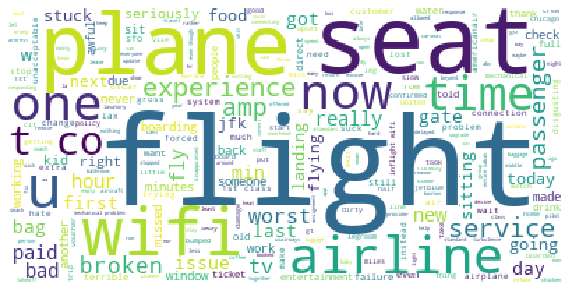

In [53]:
wordCloud_res(reason[0])

With the reason of: Late Flight


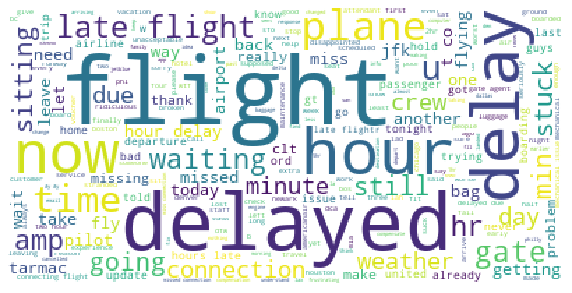

In [54]:
wordCloud_res(reason[3])

With the reason of: Customer Service Issue


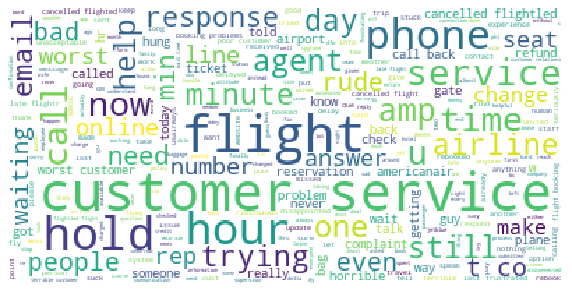

In [55]:
wordCloud_res(reason[4])

With the reason of: Flight Booking Problems


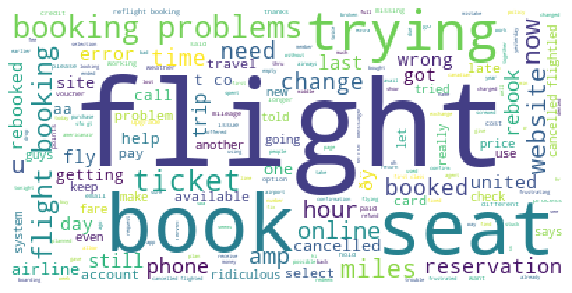

In [56]:
wordCloud_res(reason[5])

With the reason of: Lost Luggage


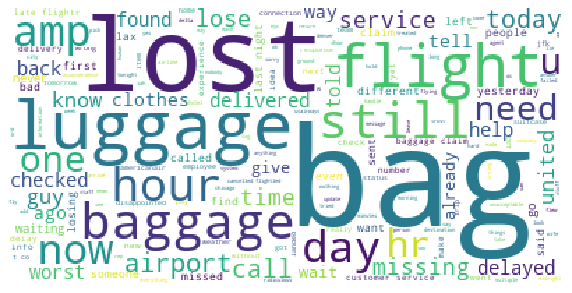

In [57]:
wordCloud_res(reason[6])

With the reason of: Flight Attendant Complaints


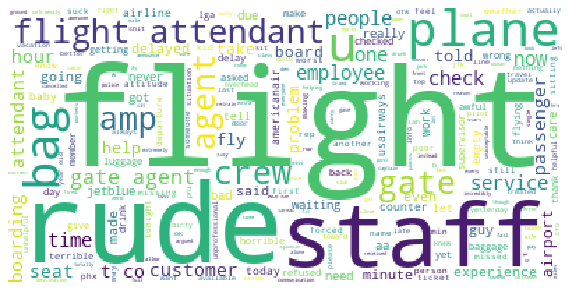

In [58]:
wordCloud_res(reason[7])

With the reason of: Cancelled Flight


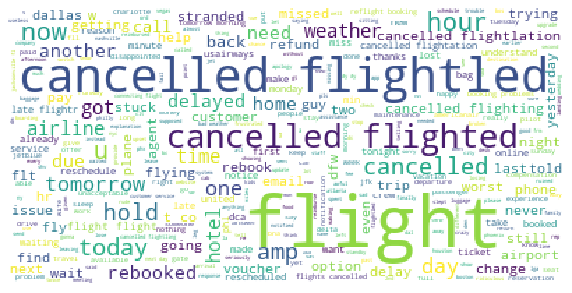

In [59]:
wordCloud_res(reason[8])

With the reason of: Damaged Luggage


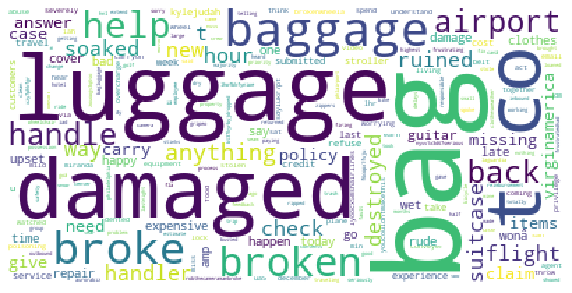

In [60]:
wordCloud_res(reason[9])

With the reason of: longlines


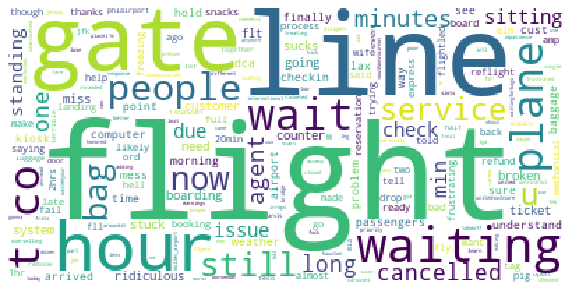

In [61]:
wordCloud_res(reason[10])